In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 85)

In [5]:
from sklearn.decomposition import PCA

def fetch_data(drop_some=True):

    df = pd.read_csv("../data/abnormal_writeout.data.csv")

    if drop_some:
        # trascurare da ACC a UVM
        start_drop = df.columns.get_loc("ACC")
        end_drop = df.columns.get_loc("UVM")
        cols = np.arange(start_drop, end_drop + 1)
        df.drop(df.columns[cols], axis=1, inplace=True)

        # trascurare old_phylo_factor e la prima colonna
        df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
        df.drop("Unnamed: 0", axis=1, inplace=True)

    return df


def separate_data(df):
    resp = df["response"]
    occ = df["occ_total_sum"]
    age = df["oldest_phylostratum"]
    conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)
    return occ, age, conf, resp


def get_PCA(X, expl_var=0.95, plot=False):

    pca_test = PCA()
    pca_test.fit(X)
    cumsum = np.cumsum(pca_test.explained_variance_ratio_)
    d = np.argmax(cumsum >= expl_var) + 1

    # Apply PCA with d components
    pca_apply = PCA(n_components=d)
    X_PCA = pca_apply.fit_transform(X)

    print("Using {} principal components.".format(d))
    print(f"Reduced features by {(784-d)/784*100:.2f} percent.")
    
    if plot == True:
        sns.heatmap(pd.DataFrame(X_PCA).corr())
        plt.show()

    return X_PCA

In [40]:
df = pd.read_csv("../data/abnormal_writeout.data.csv")
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)
df

# drop TTT_freq
# -> RF

,Unnamed: 0,response,cds_length,occ_total_sum,oldest_phylostratum,oldest_phylostratum_factor,gc_cds,dnase_gene,dnase_cds,H3k4me1_gene,H3k4me3_gene,H3k27ac_gene,H3k4me1_cds,H3k4me3_cds,H3k27ac_cds,lamin_gene,repli_gene,nsome_gene,nsome_cds,transcription_gene,repeat_gene,repeat_cds,recomb_gene,AAA_freq,AAC_freq,AAG_freq,AAT_freq,ACA_freq,ACC_freq,ACG_freq,ACT_freq,AGA_freq,AGC_freq,AGG_freq,AGT_freq,ATA_freq,ATC_freq,ATG_freq,ATT_freq,CAA_freq,CAC_freq,CAG_freq,...,CCG_freq,CCT_freq,CGA_freq,CGC_freq,CGG_freq,CGT_freq,CTA_freq,CTC_freq,CTG_freq,CTT_freq,GAA_freq,GAC_freq,GAG_freq,GAT_freq,GCA_freq,GCC_freq,GCG_freq,GCT_freq,GGA_freq,GGC_freq,GGG_freq,GGT_freq,GTA_freq,GTC_freq,GTG_freq,GTT_freq,TAA_freq,TAC_freq,TAG_freq,TAT_freq,TCA_freq,TCC_freq,TCG_freq,TCT_freq,TGA_freq,TGC_freq,TGG_freq,TGT_freq,TTA_freq,TTC_freq,TTG_freq,TTT_freq
0,1,0,-0.231676,-0.130244,1.901010,12.0,1.447504,1.190150,1.406066,0.022281,1.801757,-0.591137,0.472681,1.949397,-0.455623,-0.479855,0.577770,-0.254277,-0.303028,-0.093107,0.311667,-0.187624,-1.174934,-0.962971,-0.909913,-1.508122,-1.087512,-0.872773,1.602265,0.829956,-1.047882,-1.270695,1.036989,0.069038,-0.612966,-1.112302,-1.409381,-0.649559,-1.176062,-1.312306,0.391324,0.058646,...,1.409963,0.829268,1.797335,1.548229,0.903817,0.933719,-0.397981,-0.086160,1.414753,-0.346887,-1.243235,1.238157,0.943669,-0.824115,-0.356196,0.875956,1.696366,1.730229,0.054776,0.825449,1.145792,0.554808,-1.577040,0.447125,1.275182,-1.257541,-1.204038,-0.352835,-1.386701,-1.119012,-1.408061,0.539373,0.823120,-0.884699,0.161293,0.846379,0.539268,-0.628905,-1.111766,-0.365622,-1.157372,-0.412003
1,10,0,-0.479485,-0.225925,-0.683952,1.0,-1.218667,-0.855190,-0.428028,0.270554,-0.960246,-1.130393,-1.107698,-0.782452,-0.930966,2.172908,-0.728317,-0.208823,0.333337,-0.119886,-0.398704,-0.187624,0.584057,0.296533,1.149042,-0.065966,1.388289,1.197949,0.253892,-0.778624,-0.132201,1.166816,-1.541005,-0.402150,-1.145869,1.333728,0.803758,-0.693085,2.705568,0.155822,-0.765681,-0.887983,...,-0.957495,-0.087426,-0.863659,-0.832224,-0.722976,-0.935078,-0.265076,0.174855,-0.599223,0.643374,1.017265,-0.225132,-0.370956,-0.282280,-0.689413,-1.277163,-0.978026,-0.930006,-0.676247,-0.838694,-0.038881,1.621418,-0.204153,-0.754478,-0.854915,0.639916,0.874857,1.208705,0.421527,1.247031,-0.065484,-0.327448,-0.151612,0.993725,0.200062,-0.895657,0.323194,-0.540768,2.205386,0.249155,1.918490,1.857967
2,100,1,-0.391241,-0.072836,-0.683952,1.0,0.482389,0.672705,0.928634,0.768924,0.019239,0.408770,0.695625,-0.699896,-0.723082,-0.479855,0.541861,0.772266,0.752547,-0.095956,0.083483,-0.187624,-0.427398,-0.104715,-0.181644,0.094350,-0.968550,0.069944,1.245460,0.097957,0.348878,0.087571,-0.020092,0.793797,-0.262386,-0.625139,-0.015744,0.063679,-0.847768,-0.097626,0.058707,0.230716,...,-0.127896,0.624825,-0.388801,0.004821,0.294804,-0.559719,1.592316,-0.331791,0.390118,-0.739430,-0.674981,1.372832,0.379733,-0.626983,-0.528783,0.706419,-0.258796,0.598618,0.637801,0.690812,0.387350,0.448131,0.524565,-0.196243,-0.236192,-1.185901,-0.125129,0.573989,0.087986,-0.064738,-0.423978,-0.208042,0.784968,-1.144029,-0.571964,-0.053218,0.515054,-0.711053,-0.483593,-0.921655,-1.267833,-0.522241
3,1000,0,0.296983,1.649415,-0.683952,1.0,-0.794498,-0.525282,-0.152416,0.003209,-0.815461,-0.437862,-0.461587,-0.723912,-0.569118,-0.479855,-1.137745,0.007207,0.798077,-0.111170,-0.178076,-0.187624,-0.190946,0.099659,0.298522,-0.005526,1.484987,0.713881,-0.454725,-0.193328,0.464364,0.145263,-0.500734,-0.893309,0.686977,0.905230,1.622440,0.609473,0.770784,1.164331,-0.696708,-0.068439,...,-0.520962,-0.388488,-0.352416,-0.573491,-0.361055,-0.499743,-0.710679,-1.045508,-0.383306,0.040561,0.011920,1.428825,-0.734995,0.908960,-0.647483,-0.473808,-0.526752,-0.708639,-0.813613,-0.925574,-0.740244,0.185416,0.788469,-0.953331,0.313504,0.496344,1.057425,-0.315237,0.226605,1.158869,0.707721,-0.020972,-0.420635,-1.054114,1.616000,-0.070003,-0.723890,0.253554,1.335076,-0.278880,0.378629,0.

In [34]:
df.mean(axis=0)

response               0.227518
cds_length            -0.005643
occ_total_sum          0.238723
oldest_phylostratum   -0.036929
gc_cds                -0.014098
                         ...   
TGT_freq              -0.004685
TTA_freq               0.011986
TTC_freq               0.001865
TTG_freq               0.013744
TTT_freq               0.268285
Length: 85, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

# Data
df = fetch_data()  # Get
df.dropna(inplace=True)  # Clean
X_occ, X_age, X_conf, Y = separate_data(df)  # Separate
X_conf_pca = get_PCA(X_conf, plot=False)  # PCA

# All features, confounders with PCA
X = np.c_[X_occ, X_age, X_conf_pca]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Using 47 principal components.
Reduced features by 94.01 percent.


<AxesSubplot:>

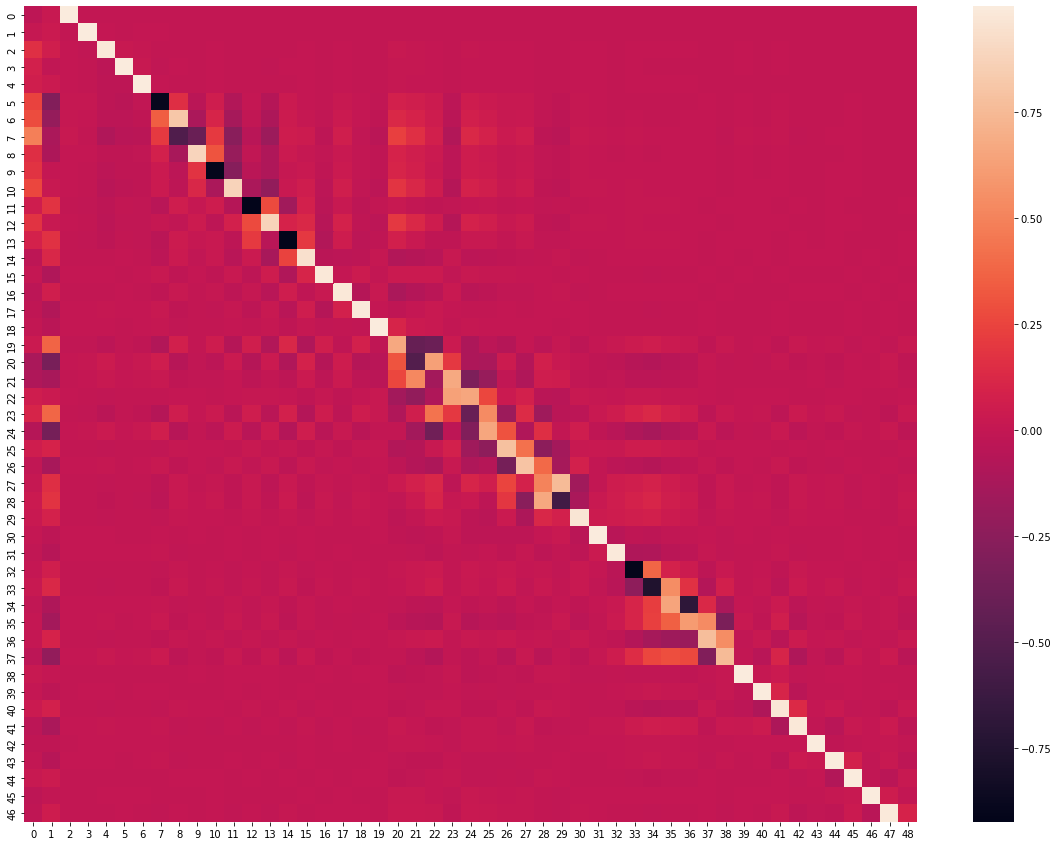

In [27]:
pca_test = PCA()
pca_test.fit(X_conf)
cumsum = np.cumsum(pca_test.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# Apply PCA with d components
pca_apply = PCA(n_components=d)
X_PCA = pca_apply.fit_transform(X)

# print("Using {} principal components.".format(d))
# print(f"Reduced features by {(784-d)/784*100:.2f} percent.")

plt.figure(figsize=(20,15))
sns.heatmap(pca_apply.components_)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

skb = SelectKBest(f_classif, k=10).fit(x_train, y_train)
skb.pvalues_[0:10]

array([2.43030630e-100, 1.57787237e-064, 1.35715104e-001, 1.04064176e-001,
       1.59681258e-004, 3.55321252e-005, 2.22247215e-001, 1.67843480e-014,
       5.48454099e-008, 7.15240807e-001])

In [7]:
plot_df = pd.DataFrame(np.c_[Y, X])
plot_df = plot_df.rename(columns={0: "response", 1: "occ_sum", 2: "age"})
plot_df = plot_df.sample(1000)
plot_df.head()

,response,occ_sum,age,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
5636,1.0,3.945749,-0.448955,2.101040,0.409851,2.547579,-0.276197,0.755836,-1.577013,1.148661,0.303640,1.099817,-0.103369,0.702346,-0.439087,0.445326,-1.124821,0.465129,-0.421483,0.138087,-0.050001,1.608059,2.577761,0.863649,-1.499710,1.433616,1.871845,0.320214,0.878115,-1.013280,-0.668737,0.978390,0.136675,0.628260,0.449267,0.097397,0.006945,0.536960,0.059247,0.054641,0.754267,-0.024342,0.135366,-0.260803,-0.476730,0.005787,-0.162948,-0.177800,0.163636,0.113921
11855,0.0,-0.321606,-0.683952,1.350601,0.680608,-2.993233,-2.603776,-1.850225,-0.506734,1.531946,-0.035789,-0.276107,-0.518827,0.210332,1.363972,-1.506505,-1.845094,0.099701,2.315321,-1.140141,1.060885,-0.326574,-0.349767,0.203405,-0.468162,0.922654,0.857812,0.860747,-0.218927,1.394524,0.176037,0.385585,-0.081609,0.114616,-0.882902,-0.239450,0.269691,-0.346596,0.047034,2.327643,0.465383,0.613647,0.240585,0.424181,-0.160442,-0.843951,-0.181294,0.315881,-0.695826,-0.688995
3043,0.0,-0.493831,3.780982,5.691494,0.406039,-1.012924,-1.995066,0.535384,-0.034451,-1.555887,-2.385307,-1.580820,-0.836757,-2.358406,0.378062,-0.557785,0.571826,-0.113746,-0.546867,-0.412295,0.375346,0.597016,-1.922699,-1.635324,-0.938607,0.261573,0.284809,-0.821583,-0.274179,0.273755,0.542604,-1.179190,-0.282601,0.100111,-0.198845,-0.595852,1.292284,0.574476,0.657830,-0.723532,0.401707,1.123706,-0.079718,0.384220,0.463215,-0.255881,0.412837,-1.350261,-1.576927,0.089582
2286,0.0,-0.493831,-0.448955,4.764472,-0.255884,-1.488060,2.879385,-0.823915,-2.646241,0.075651,-1.264149,-0.337537,1.194387,0.804603,0.888394,-1.740009,1.601100,-1.341377,-0.665215,0.077432,-0.204144,-0.792615,0.040357,0.695314,-1.063427,-0.849225,1.131703,-0.267841,0.512287,-0.211578,1.256095,-0.733605,-0.784642,1.117703,-0.017849,-0.982415,0.604494,1.097952,0.268068,-2.231197,1.299965,-0.672810,-0.067881,0.376463,-0.231613,1.061097,0.644459,-0.534509,0.032056,0.371361
5745,0.0,1.228420,-0.448955,9.646193,-0.738229,0.460281,0.652990,-0.470109,1.461893,0.279274,-1.241518,0.072759,-1.458569,-1.347522,-0.348928,1.707364,-0.437926,0.437308,0.183463,-0.777113,-1.427518,1.875591,0.036903,-0.099979,0.083452,0.179294,-0.301949,-0.759015,0.522521,-0.677492,0.520603,0.730823,0.045498,0.114921,-0.187755,-0.764350,-0.057342,-0.053496,0.267360,0.233083,0.367089,0.139602,0.238398,-0.393258,-0.142983,0.000689,0.126415,0.834445,-0.171347,-0.283369


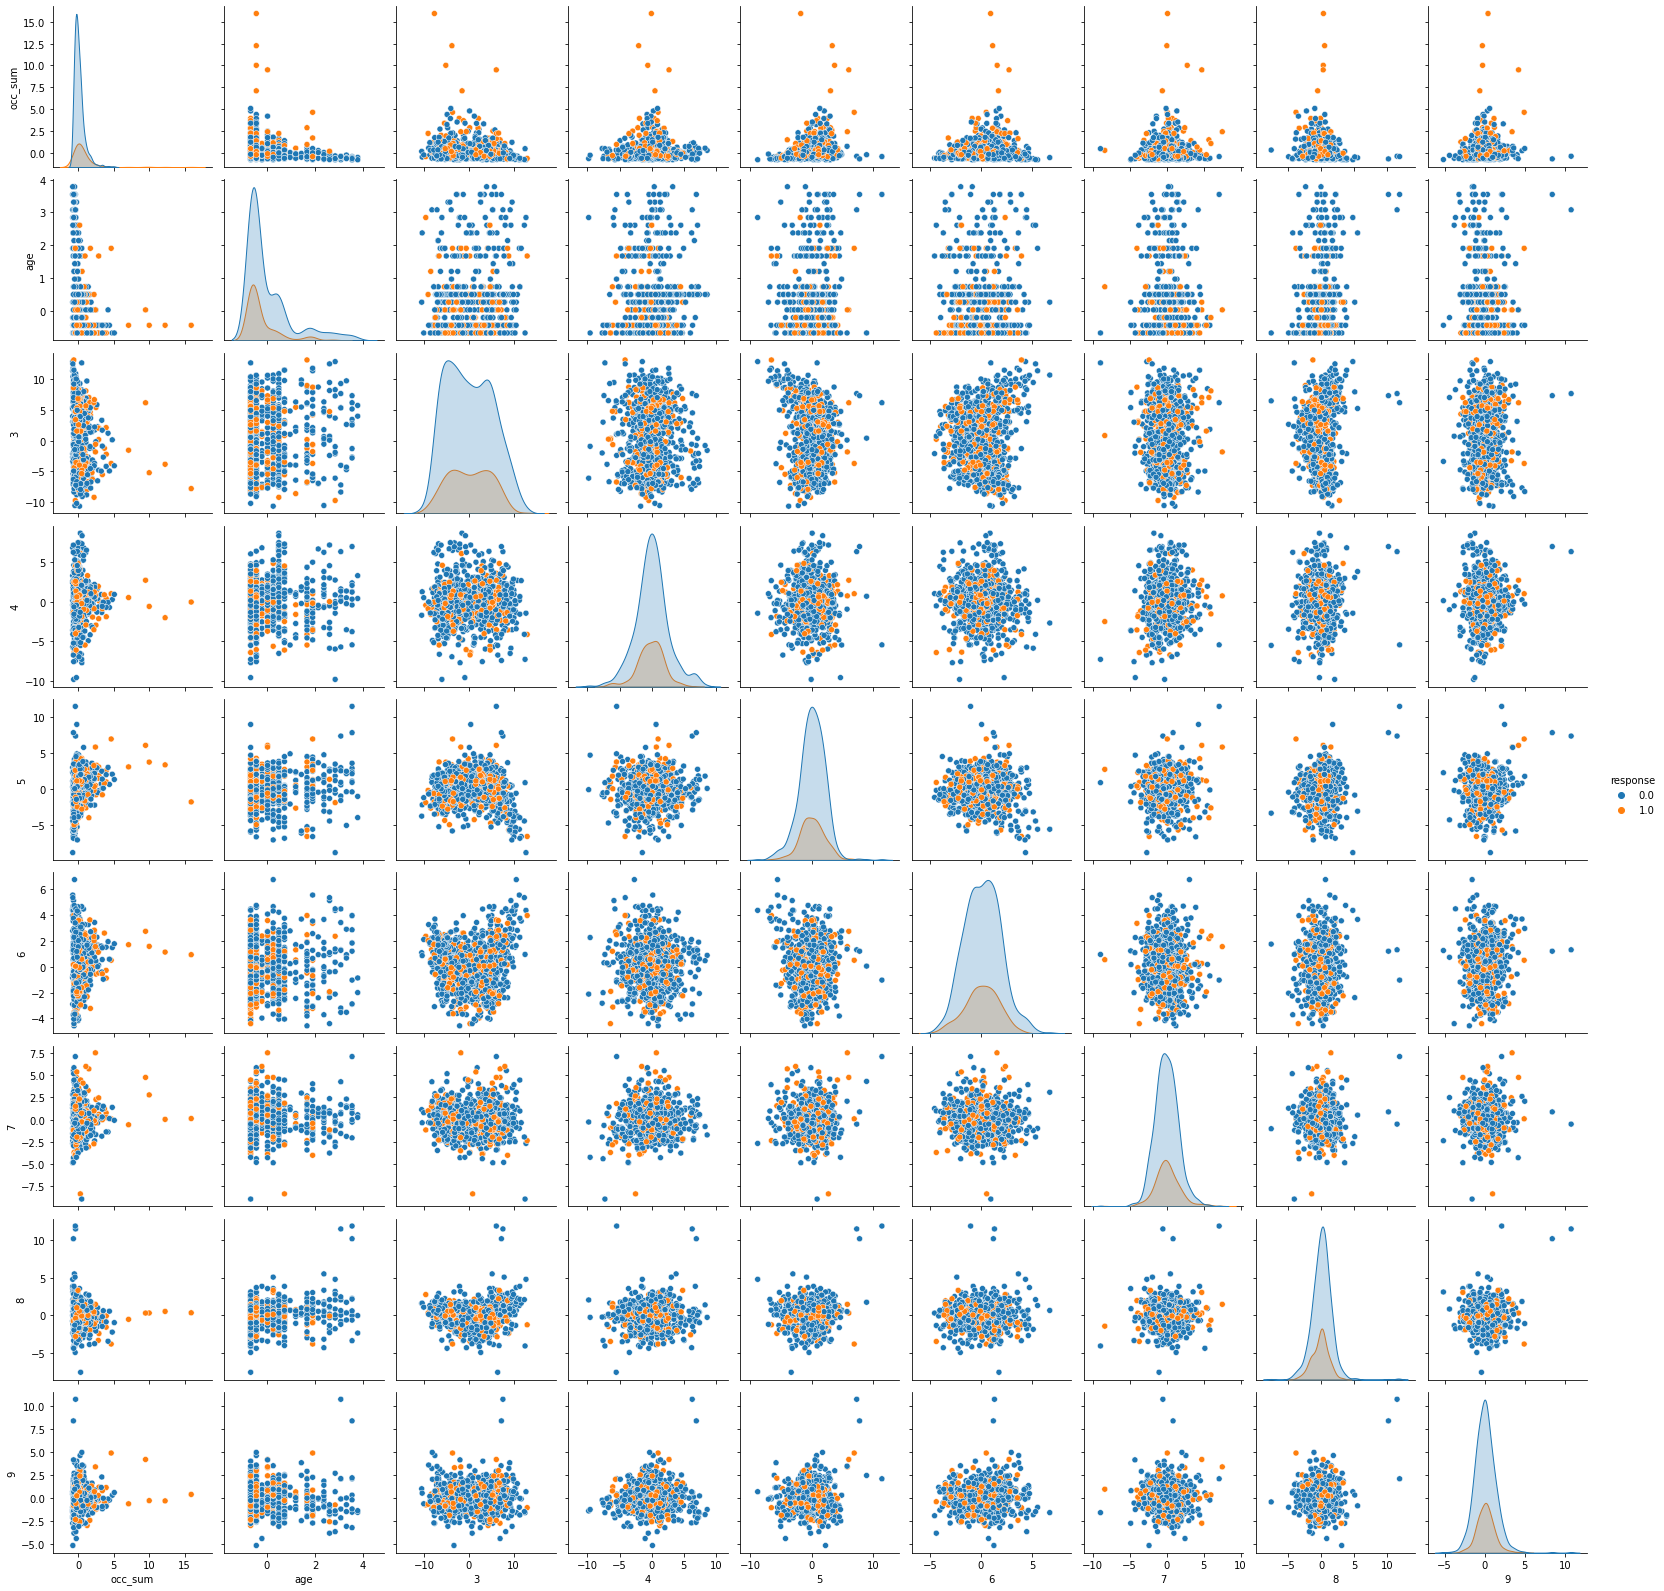

In [8]:
sns.pairplot(plot_df.iloc[:, 0:10], hue="response")
plt.show()